# Synthetic Minority Over-Sampling Technique (SMOTE)
- A technique used in ML to address Imbalanced Datasets where the minority class has significantly fewer instances than the majority class. SMOTE involves generating "Synthetic" instances  of the minority class by "Interpolating" between existing instances.
- It's basically to add new data (Synthetic data) by Interpolation

In [5]:
import numpy as np
import pandas as pd

In [6]:
from sklearn.datasets import make_classification


In [7]:

#THIS IS ANOTHER WAY TO GENERATE DATA
make_classification(n_samples= 100)

(array([[-0.35916244,  0.23889499, -0.98027495, ...,  0.02408386,
          0.19646459,  0.72404405],
        [-0.09593603, -0.18943372,  1.0560778 , ..., -1.94186221,
          0.06038763, -1.46938333],
        [ 0.55647308,  1.32378546, -0.12224642, ...,  0.11683106,
         -0.60499169, -1.24876497],
        ...,
        [ 2.00595848,  0.02987655,  1.94897008, ...,  1.30067703,
          1.32119837,  1.07366106],
        [ 1.09063056, -1.12879593,  0.39428291, ..., -0.23159341,
          0.35071859,  0.22022796],
        [ 0.14576215,  0.63333931,  0.37879846, ..., -0.63803011,
         -0.57792134,  0.72346021]], shape=(100, 20)),
 array([0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
        1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
        1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1]))

In [8]:
x, y = make_classification(n_samples= 1000, #creates 1000 sample points
                    n_features= 2,      # we need 2 features f1 f2
                    n_redundant=0,      # with this we can create another feature which will be some linear combination of the f1 f2
                    n_clusters_per_class = 1,    
                    weights= [0.9],         #ratio of 1's and 0's
                    random_state= 95)    #seed

#the shape of the data will be 1000,2 
# setting y as the target or independent variable
# x has the 2 features which is the dependent variable

In [9]:
df1 = pd.DataFrame(x, columns= ['f1', 'f2'])
df2 = pd.DataFrame(y, columns= ['target'])

df = pd.concat([df1, df2], axis=1)

df
#this is our data

,f1,f2,target
0,-0.668676,-1.679124,0
1,-1.335231,-1.455888,0
2,-0.545730,-1.814377,0
3,0.598941,-0.939493,1
4,-0.372645,-0.724763,0
...,...,...,...
995,-1.581647,-0.472623,0
996,-1.157850,-1.372397,0
997,0.567719,1.988245,1
998,-0.270286,-1.373649,0


In [10]:
import matplotlib.pyplot as plt

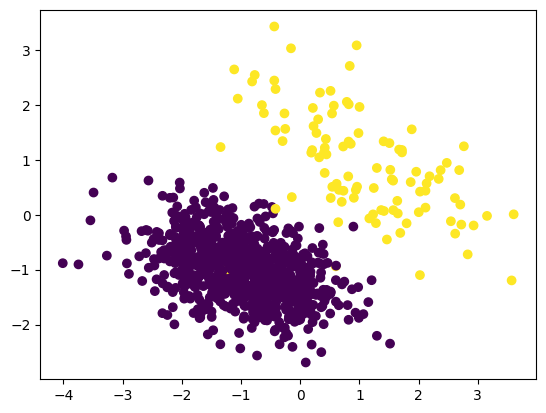

In [11]:
plt.scatter(x = df.f1 ,
            y = df.f2,
            c = df.target)

In [40]:
df.shape

(1000, 3)

In [41]:
df.target.value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [27]:
# We will use imblearn library to use smore
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [28]:
from imblearn.over_sampling import SMOTE

In [44]:
oversample = SMOTE()    #creating a smote object basically ow SMOTE.fit_resample

x, y = oversample.fit_resample(df[['f1','f2']]        #need to give the df of features to be resampled
                                , df.target)

x.shape

(1800, 2)

In [49]:
x

,f1,f2
0,-0.664289,0.586378
1,-0.582431,-0.487028
2,0.339579,-1.059446
3,0.599289,-0.650324
4,1.088540,-0.124209
...,...,...
1795,2.291182,4.838162
1796,-2.170796,0.493243
1797,-0.107169,-0.475593
1798,-0.457692,-0.372423


In [45]:
y.shape

(1800,)

In [46]:
y.value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [52]:
# the x and y are already in a df format

oversampled_df = pd.concat([x,y], axis=1)
oversampled_df

,f1,f2,target
0,-0.664289,0.586378,0
1,-0.582431,-0.487028,0
2,0.339579,-1.059446,0
3,0.599289,-0.650324,0
4,1.088540,-0.124209,0
...,...,...,...
1795,2.291182,4.838162,1
1796,-2.170796,0.493243,1
1797,-0.107169,-0.475593,1
1798,-0.457692,-0.372423,1


In [50]:
# osdf1 = pd.DataFrame(x, columns=['f1', 'f2'])
# osdf2 = pd.DataFrame(y, columns=['target'])

# oversampled_df = pd.concat([osdf1, osdf2], axis=1)
# oversampled_df

,f1,f2,target
0,-0.664289,0.586378,0
1,-0.582431,-0.487028,0
2,0.339579,-1.059446,0
3,0.599289,-0.650324,0
4,1.088540,-0.124209,0
...,...,...,...
1795,2.291182,4.838162,1
1796,-2.170796,0.493243,1
1797,-0.107169,-0.475593,1
1798,-0.457692,-0.372423,1


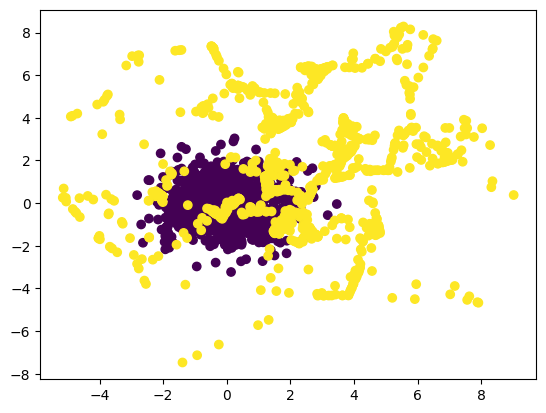

In [51]:
plt.scatter(x = oversampled_df.f1 , y = oversampled_df.f2 , c = oversampled_df.target)

### Earlier we have done the following to generate data

In [29]:
# Prepare an Imbalanced Data
# we have two categories each category have two features
# category 1 has only 1 (900 sample)
# category 2 has only 0 (100 sample)

In [30]:
import numpy as np
import pandas as pd

In [31]:
np.random.seed(95)

#total sample
n = 1000

n1 = int(n * 0.9) #90% of the sample will give 1
n2 = n - n1     #remaining gives 0

#clearly its an imbalanced or biased data

(n1, n2)

(900, 100)

In [32]:
category1 = {
    "f1" : np.random.normal(0,1,n1),
    "f2" : np.random.normal(0,1,n1),
    "target" : [0] * n1
}

category2 = {
    "f1" : np.random.normal(2,3,n2),
    "f2" : np.random.normal(2,3,n2),
    "target" : [1] * n2
}

In [33]:
df1 = pd.DataFrame(category1)
df2 = pd.DataFrame(category2)

In [34]:
df = pd.concat([df1, df2]).reset_index(drop=True)   #if False this will create another column of index
df

,f1,f2,target
0,-0.664289,0.586378,0
1,-0.582431,-0.487028,0
2,0.339579,-1.059446,0
3,0.599289,-0.650324,0
4,1.088540,-0.124209,0
...,...,...,...
995,-0.485903,7.360708,1
996,-4.034593,-1.643009,1
997,4.159531,3.021006,1
998,1.185737,1.244661,1


In [35]:
df.target.value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [36]:
df.shape

(1000, 3)

In [37]:
df_minority = df[df["target"]== 1]
df_majority = df[df["target"] == 0]

In [38]:
# Previously we have used resample > up-sampling down-sampling

#SMOTE

from sklearn.datasets import make_classification #import using 

#### Just random things - was exploring 'make_classifications'


In [92]:
# exploring the classifications 

x1, y1 = make_classification(n_samples=200, n_clusters_per_class=1, n_redundant=0, n_features=2, weights=[0.8])

In [93]:
x1.shape

(200, 2)

In [94]:
y1.shape

(200,)

In [95]:
x1 = pd.DataFrame(x1, columns=['a', 'b'])
y1 = pd.DataFrame(y1, columns=['t'])

data = pd.concat([x1,y1], axis=1)
data

,a,b,t
0,-0.613441,2.892432,0
1,-1.033434,0.321043,0
2,-1.104085,1.478979,0
3,-1.299110,0.420012,0
4,-1.384905,-0.208691,0
...,...,...,...
195,-0.708638,1.876566,0
196,-1.337154,-1.435930,1
197,-0.469787,2.999016,0
198,-1.241667,-1.359079,1


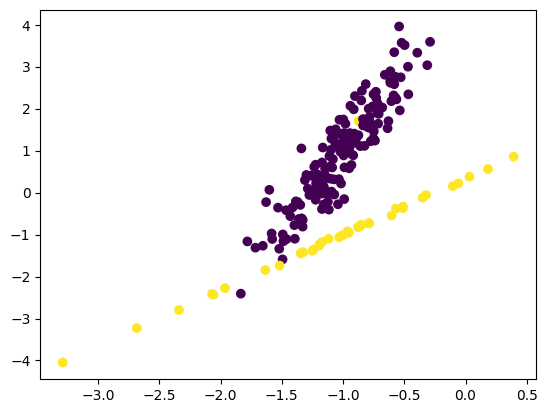

In [97]:
plt.scatter(data['a'], data['b'], c = data['t'])
# plt.plot(x1[2])